Task 1 - Exploratory Data Analysis (EDA)

**Data Set Source** : https://techassessment.blob.core.windows.net/aiap13-assessment-data/failure.db <br>


**Data Set Information:** <br>

The dataset contains the specifications of the cars as well as parameters measured by the car sensors.

**Features Information:** <br>

<ol>
  <li>Car ID : Car unique ID</li>
  <li>Model : Car model 3,5 and 7 (in the order of increasing specifications</li>
  <li>Colour : Colour of the car</li>
  <li>Temperature : Average 30 days temperature of the car engine before failure detected</li>
  <li>RPM : Average 30 days maximum torque speed at maximum torque before failure
detected</li>
  <li>Factory : Manufacturing origin of the car</li>
  <li>Usage : Owner usage frequency of the car</li>
  <li>Fuel consumption : Fuel consumption of the car in Litre per kilometre</li>
  <li>Membership : Type of membership subscripted by the car owner with the automotive company.<br>
      “Normal” membership offers subscribers two complimentary car servicing per year.<br>
      “Premium” membership offers subscribers unlimited car servicing.<br>
      Car owners are automatically subscribed with “Normal” membership for the first five years after car purchase.
  </li>
  <li>Failure A - E :  A type of car failure: “0” = Corresponding fault not identified, “1” =
Corresponding fault identified </li>
</ol>


**Objective** <br>
Apply perform EDA on the dataset and predict the occurance of car failure using at least 3 models.


**Preprocessing** <br>

<ol>
  <li>Check and resolve missing values</li>
  <li>Remove duplicated rows</li>
  <li>Check for invalid, incorrect values</li>
  <li>Understand the features and perform feature engineering</li>
  <li>Remove outliers</li>
</ol>

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Read database into Dataframe

In [2]:
con = sqlite3.connect("data/failure.db")
df = pd.read_sql_query("SELECT * from failure", con)
con.close()


In [3]:
# Verify that result of SQL query is stored in the dataframe
df.head(10)


,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,"Model 5, 2022",Blue,110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0,0,0,0,0
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,"Model 3, 2022",Black,110.4 °C,1408,"Shang Hai, China",Medium,705.3,Premium,1,0,0,0,0
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,"Model 3, 2022",Grey,110.3 °C,1498,"Shang Hai, China",Low,670.7,Premium,0,0,0,0,0
3,ff864366-fe5e-409e-9b2f-8fe440d8cc5b,"Model 3, 2022",Black,110.4 °C,1433,"Berlin, Germany",High,630.6,Premium,1,0,0,0,0
4,10484506-1be0-4a86-8dbc-b8b2092b93b2,"Model 3, 2022",White,230.7 °C,1408,"New York, U.S",High,660.9,Normal,0,1,0,0,0
5,3b5e4310-9f3f-4c4d-92c3-ec09fa36f772,"Model 5, 2021",White,110.3 °C,1425,"Shang Hai, China",Medium,691.8,Premium,0,0,0,0,0
6,6758d615-185a-4ad3-b9a5-d5b4ebf9e933,"Model 3, 2021",White,110.3 °C,1558,"Shang Hai, China",Medium,660.1,Premium,0,0,0,0,0
7,ee7d677a-8f65-4773-a158-e59843ae8109,"Model 3, 2021",White,110.3 °C,1527,"Berlin, Germany",Medium,673.0,Premium,0,0,0,0,0
8,bcac8a8b-fb2c-43d9-aa80-193421f70e36,"Model 5, 2021",Red,110.4 °C,1667,"Shang Hai, China",Medium,655.6,Normal,0,0,0,0,0
9,fef5d386-9636-4a63-8a39-67bd005be989,"Model 5, 2021",Black,110.4 °C,1741,"Berlin, Germany",Medium,648.9,Normal,0,0,0,0,0


Display the range of unique values

In [4]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

Car ID : ['137b948a-c99f-4afa-a2a7-9ef65ae51e8f'
 '3395a182-7e76-4fb3-94ba-5163d8f4e6b0'
 '8c6a8e5b-d869-4665-b739-819c9e4a2070' ...
 '30f99d04-5fe1-42c8-bfc1-5bcac4ea95a7'
 'd1f669dc-6fe2-4a0d-b5a9-26d3c6ab2c59'
 '8aa49bd0-e297-4e6d-a031-72ea40325e75']
Model : ['Model 5, 2022' 'Model 3, 2022' 'Model 5, 2021' 'Model 3, 2021'
 'Model 7, 2021' 'Model 5, 2020' 'Model 3, 2020' 'Model 7, 2020'
 'Model 5, 2019' 'Model 7, 2019' 'Model 3, 2019' 'Model 5, 2018'
 'Model 3, 2018' 'Model 7, 2018' 'Model 3, 2017' 'Model 5, 2017'
 'Model 7, 2017' 'Model 3, 2016' 'Model 5, 2016' 'Model 7, 2016'
 'Model 3, 2015' 'Model 7, 2015' 'Model 5, 2015' 'Model 3, 2014'
 'Model 5, 2014' 'Model 3, 2013' 'Model 5, 2013' 'Model 7, 2013'
 'Model 3, 2012' 'Model 5, 2012' 'Model 7, 2022' 'Model 7, 2014'
 'Model 7, 2012' 'Model 5, 2011' 'Model 3, 2011' 'Model 7, 2011'
 'Model 3, 2010' 'Model 7, 2010' 'Model 5, 2010' 'Model 3, 2009'
 'Model 5, 2009']
Color : ['Blue' 'Black' 'Grey' 'White' 'Red']
Temperature : ['110.3 °C

### 1. Check and resolve missing values


In [5]:
print('Data frame shape : '+str(df.shape))
print(df.info())


Data frame shape : (10081, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10081 entries, 0 to 10080
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car ID            10081 non-null  object 
 1   Model             10081 non-null  object 
 2   Color             10081 non-null  object 
 3   Temperature       10081 non-null  object 
 4   RPM               10081 non-null  int64  
 5   Factory           10081 non-null  object 
 6   Usage             10081 non-null  object 
 7   Fuel consumption  10081 non-null  float64
 8   Membership        9697 non-null   object 
 9   Failure A         10081 non-null  int64  
 10  Failure B         10081 non-null  int64  
 11  Failure C         10081 non-null  int64  
 12  Failure D         10081 non-null  int64  
 13  Failure E         10081 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB
None


From the dataframe info (above), noted that all columns has 10081 values except "Membership" column has 384 missing values

In [6]:
print('Membership type')
print(df['Membership'].value_counts(), end='\n \n')
print('No. of membership with status :', end=' ')
print(df['Membership'].value_counts().sum())
print('No. of membership with missing values :', end=' ')
print(df['Membership'].isna().sum())
print('Total No. of membership :', end=' ')
print(df['Membership'].value_counts().sum() + df['Membership'].isna().sum())



Membership type
Normal     4517
Premium    3446
None       1734
Name: Membership, dtype: int64
 
No. of membership with status : 9697
No. of membership with missing values : 384
Total No. of membership : 10081


384 rows have missing Membership status<br>
Since each car are subscribed with “Normal” membership for the first five years after car purchase.<br>
Assume data is collect end of year 2022 <br>
From the year of manufacture in the "Model" column assuming the following:<br>

<ol>
  <li>Before 2018 "None" membership</li>
  <li>After 2018 has "Normal" membership</li>

</ol>

In [7]:
# Copy the year of manufacture to a new column "Year". convert it to interger and remove it from "Model"

df['Year'] = df.Model.str[8:]
df['Year'] = df['Year'].astype(int)
df['Model'] = df.Model.str[:7]


# Create temp column and fill base on car manufacture year

df['temp'] = np.where(df['Year']>= 2018, "Normal", "None")
df['Membership'].fillna(df.temp, inplace=True)
df.drop(columns=['temp'], inplace=True)

### 2. Remove duplicated rows<br>

Each Car ID should be unique<br>
Check for dupicated "CarID"

In [8]:
# look for duplicates base on "CarID" , "Model" and "Factory"

df.duplicated(subset=['Car ID', 'Model','Factory']).value_counts()

False    10000
True        81
dtype: int64

There are 81 duplicated rows<br>
Remove the duplicated rows by keeping the first instance

In [9]:
# Drop the rows which as duplicated "Car ID"

df.drop_duplicates(subset=['Car ID'], inplace=True)
df.shape

(10000, 15)

### 3. Check for invalid, incorrect values

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car ID            10000 non-null  object 
 1   Model             10000 non-null  object 
 2   Color             10000 non-null  object 
 3   Temperature       10000 non-null  object 
 4   RPM               10000 non-null  int64  
 5   Factory           10000 non-null  object 
 6   Usage             10000 non-null  object 
 7   Fuel consumption  10000 non-null  float64
 8   Membership        10000 non-null  object 
 9   Failure A         10000 non-null  int64  
 10  Failure B         10000 non-null  int64  
 11  Failure C         10000 non-null  int64  
 12  Failure D         10000 non-null  int64  
 13  Failure E         10000 non-null  int64  
 14  Year              10000 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 1.2+ MB
None


The temperature values are in string and contains units (deg C & deg F)<br>
Therefore remove the units and convert it into float

In [11]:
# Create a new "units" column and copy units
df['units'] = df.Temperature.str[-2:]

# Remove the units from "Temperature" column
df['Temperature'] = df.Temperature.str[:5]

# Convert string to float
df['Temperature'] = df['Temperature'].astype(float)

# Convert "Temperature" to °C if the "units" is  °F and remove the "units" column
df.loc[(df.units == "°F"), 'Temperature'] = round((df.Temperature-32)*5/9,1)
df.drop(columns=["units"], inplace=True)

In [12]:
# Check the ranges of columns with numerical values
df.describe()

,Temperature,RPM,Fuel consumption,Failure A,Failure B,Failure C,Failure D,Failure E,Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000
mean,113.118580,1470.970100,679.456990,0.025900,0.018500,0.031000,0.024400,0.02640,2016.60630
std,4.670757,486.047372,58.439696,0.158845,0.134757,0.173326,0.154295,0.16033,3.20305
min,110.000000,-2636.000000,598.500000,0.000000,0.000000,0.000000,0.000000,0.00000,2009.00000
25%,110.400000,1418.000000,638.875000,0.000000,0.000000,0.000000,0.000000,0.00000,2014.00000
50%,111.400000,1499.000000,668.500000,0.000000,0.000000,0.000000,0.000000,0.00000,2017.00000
75%,113.600000,1609.000000,704.200000,0.000000,0.000000,0.000000,0.000000,0.00000,2019.00000
max,230.700000,2886.000000,904.800000,1.000000,1.000000,1.000000,1.000000,1.00000,2022.00000


### Negative RPM

In [13]:
# Mark negative RPM and count the number of negative RPM
df['temp'] = np.where(df['RPM']>= 0, "Pos", "Neg")
df["temp"].value_counts()

Pos    9780
Neg     220
Name: temp, dtype: int64

In [14]:
#Check the range of the negative values
df[df["temp"].str.contains("Neg")].describe()

,Temperature,RPM,Fuel consumption,Failure A,Failure B,Failure C,Failure D,Failure E,Year
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,112.912727,-1541.045455,679.673182,0.040909,0.022727,0.009091,0.031818,0.009091,2016.231818
std,4.169954,171.664794,53.716013,0.198531,0.149373,0.095128,0.175916,0.095128,3.355073
min,110.100000,-2636.000000,599.200000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000
25%,110.500000,-1620.250000,648.700000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000
50%,111.400000,-1520.000000,671.250000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
75%,113.100000,-1429.750000,701.775000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000
max,135.000000,-1227.000000,881.600000,1.000000,1.000000,1.000000,1.000000,1.000000,2022.000000


There are 220 negative RPM values.<br>
The range of negative RPM are between -2636 and -1227 is assumed to be a realistic if it was an positive value base on the maximum positive RPM (2886) <br>
Convert all negative RPM by multiplying it by -1 to make it positive

In [15]:
# Convert  negative "RPM" to positive and remove the "temp" column
df.loc[(df.temp == "Neg"), 'RPM'] = df.RPM * -1
df.drop(columns=["temp"], inplace=True)

In [16]:
# Check the range are no longer negative  
df.describe()

,Temperature,RPM,Fuel consumption,Failure A,Failure B,Failure C,Failure D,Failure E,Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000
mean,113.118580,1538.776100,679.456990,0.025900,0.018500,0.031000,0.024400,0.02640,2016.60630
std,4.670757,179.284096,58.439696,0.158845,0.134757,0.173326,0.154295,0.16033,3.20305
min,110.000000,1168.000000,598.500000,0.000000,0.000000,0.000000,0.000000,0.00000,2009.00000
25%,110.400000,1423.000000,638.875000,0.000000,0.000000,0.000000,0.000000,0.00000,2014.00000
50%,111.400000,1503.000000,668.500000,0.000000,0.000000,0.000000,0.000000,0.00000,2017.00000
75%,113.600000,1612.000000,704.200000,0.000000,0.000000,0.000000,0.000000,0.00000,2019.00000
max,230.700000,2886.000000,904.800000,1.000000,1.000000,1.000000,1.000000,1.00000,2022.00000


### 4. Understand the features and perform feature engineering
The objective is to predict the occurrence of any car failure (binary classfication).<br>
Therefore combine the 5 different car failures into 1 column "Failure"

In [17]:
# Create a new column "Failure" which has represented by "0" if there are no failures and "1" if it has any one of the 5 failures
df["Failure"] = df["Failure A"] | df["Failure B"]| df["Failure C"]| df["Failure D"]


Assuming that for each model,the cars manufactured each year at the same factory are of the same quality and reliabiliy<br>
The year is not required

Remove the unnecessary columns Car ID, Color, Failure A - E and Year

In [18]:
df = df.drop(["Car ID", "Color", "Failure A", "Failure B", "Failure C", "Failure D", "Failure E", "Year" ] , axis = 1)
df.head()

,Model,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure
0,Model 5,110.3,1551,"Shang Hai, China",Medium,659.7,Normal,0
1,Model 3,110.4,1408,"Shang Hai, China",Medium,705.3,Premium,1
2,Model 3,110.3,1498,"Shang Hai, China",Low,670.7,Premium,0
3,Model 3,110.4,1433,"Berlin, Germany",High,630.6,Premium,1
4,Model 3,230.7,1408,"New York, U.S",High,660.9,Normal,1


**Check for any highly correlated features**<br>

So that the number of features can be reduced

<AxesSubplot: >

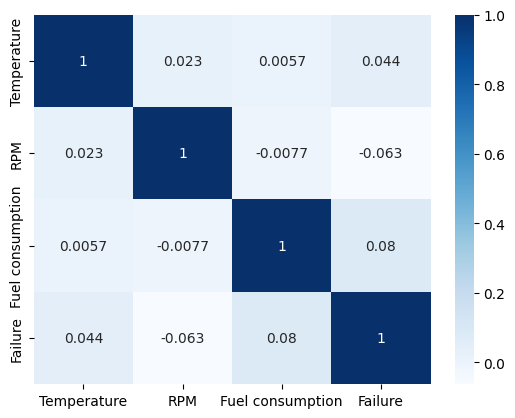

In [19]:
# Print heatmap to check if there is any highly correlated features
sns.heatmap(df.corr(numeric_only=True),cbar=True,annot=True,cmap='Blues')

There do not seems to have high corelation columns among the features

In [20]:
#Convert Failure from numbers into string for plot
df['Failure'] = np.where(df['Failure']== 0, "0", "1")


In [21]:
df.head()

,Model,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure
0,Model 5,110.3,1551,"Shang Hai, China",Medium,659.7,Normal,0
1,Model 3,110.4,1408,"Shang Hai, China",Medium,705.3,Premium,1
2,Model 3,110.3,1498,"Shang Hai, China",Low,670.7,Premium,0
3,Model 3,110.4,1433,"Berlin, Germany",High,630.6,Premium,1
4,Model 3,230.7,1408,"New York, U.S",High,660.9,Normal,1


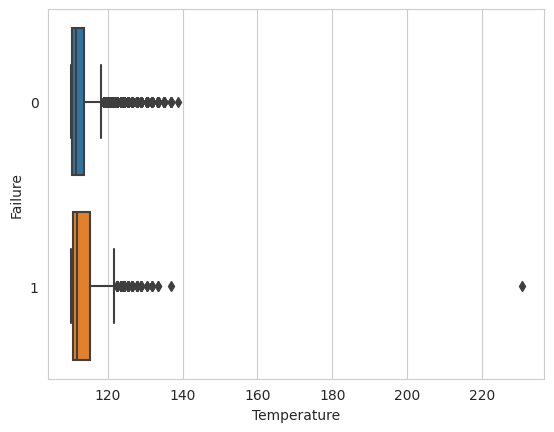

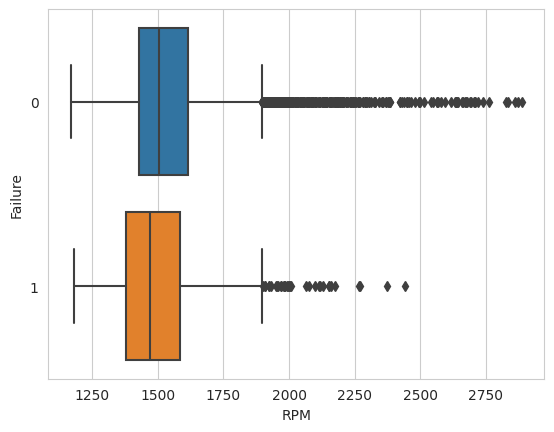

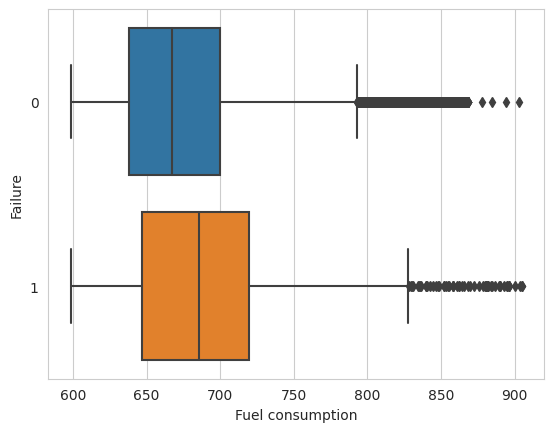

In [22]:
def plot_box(data, cols, col_x = 'Failure'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(x = col, y = col_x, data=data)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_x)# Set text for y axis
        plt.show()

num_cols = ["Temperature", "RPM", "Fuel consumption"]
# print(num_cols)

plot_box(df, num_cols)

Noticed from the temperature box plot there is one or more outlier which caused the plot range to be limited.

In [23]:
# Number of rows temperature value is more than 140 deg C
(df["Temperature"] > 140).sum()

1

In [24]:
# Remove the row which temperature >140 deg C
df.drop(df[df['Temperature'] > 140].index, inplace = True)


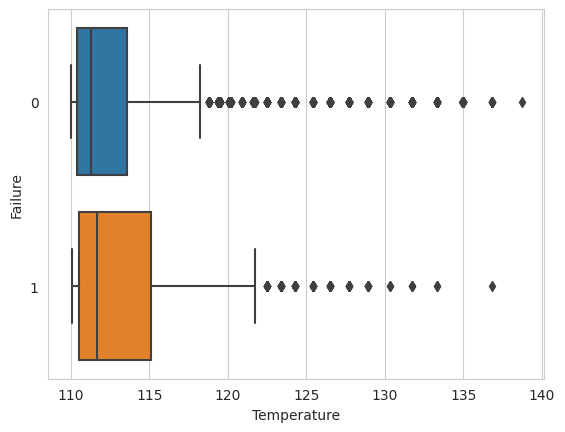

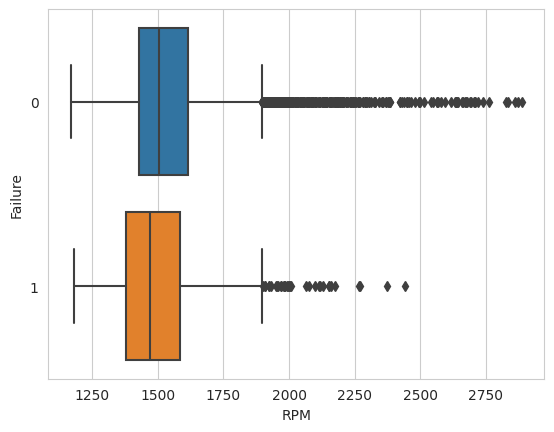

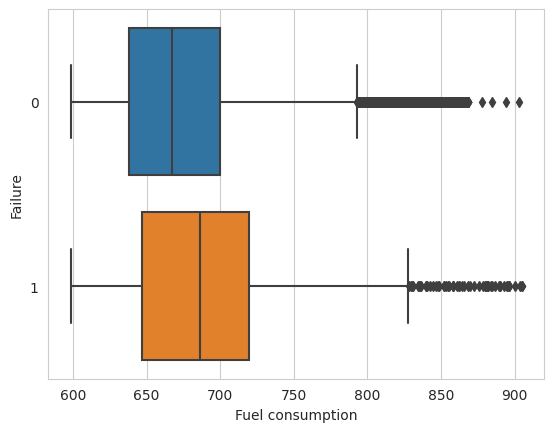

In [25]:
#Plot again
plot_box(df, num_cols)

### Interpretation

<ol>
    <li>Temperature : The median temperature of cars with failure is slightly higher than cars without failure</li>
    <li>RPM : Cars with failure seems to have lower  median RPM</li>
    <li>Fuel Consumption : Cars with failure have higher median fuel consumption</li>
</ol>


In [26]:
df.head()

,Model,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure
0,Model 5,110.3,1551,"Shang Hai, China",Medium,659.7,Normal,0
1,Model 3,110.4,1408,"Shang Hai, China",Medium,705.3,Premium,1
2,Model 3,110.3,1498,"Shang Hai, China",Low,670.7,Premium,0
3,Model 3,110.4,1433,"Berlin, Germany",High,630.6,Premium,1
5,Model 5,110.3,1425,"Shang Hai, China",Medium,691.8,Premium,0


In [27]:
df.groupby('Model').size()

Model
Model 3    5999
Model 5    2997
Model 7    1003
dtype: int64

In [28]:
df2=df.groupby(['Factory', "Failure"]).size()
factoryfail=df2.values.tolist()
print(df2)
print(factoryfail)
names=df2.index.tolist()
names=list(names)
print(names)




Factory           Failure
Bedok, Germany    0             5
                  1            25
Berlin, Germany   0          2015
                  1           200
New York, U.S     0          1941
                  1           185
Newton, China     0             3
                  1            41
Seng Kang, China  0            24
                  1            82
Shang Hai, China  0          5014
                  1           464
dtype: int64
[5, 25, 2015, 200, 1941, 185, 3, 41, 24, 82, 5014, 464]
[('Bedok, Germany', '0'), ('Bedok, Germany', '1'), ('Berlin, Germany', '0'), ('Berlin, Germany', '1'), ('New York, U.S', '0'), ('New York, U.S', '1'), ('Newton, China', '0'), ('Newton, China', '1'), ('Seng Kang, China', '0'), ('Seng Kang, China', '1'), ('Shang Hai, China', '0'), ('Shang Hai, China', '1')]


<AxesSubplot: >

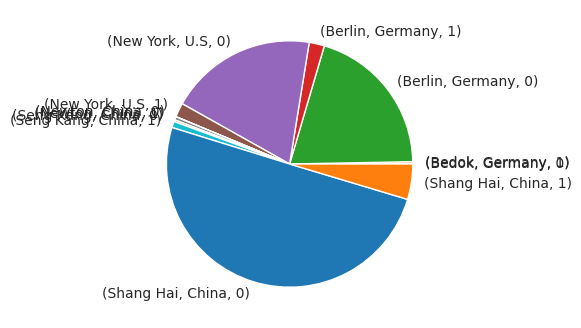

In [29]:
df2.plot.pie(figsize=(4,4))

In [30]:
df.head()

,Model,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure
0,Model 5,110.3,1551,"Shang Hai, China",Medium,659.7,Normal,0
1,Model 3,110.4,1408,"Shang Hai, China",Medium,705.3,Premium,1
2,Model 3,110.3,1498,"Shang Hai, China",Low,670.7,Premium,0
3,Model 3,110.4,1433,"Berlin, Germany",High,630.6,Premium,1
5,Model 5,110.3,1425,"Shang Hai, China",Medium,691.8,Premium,0


### 5. Remove Outliers
Using Z score method

In [31]:
num_col = ["Temperature", "RPM", "Fuel consumption"]
df2 = df[num_col]
# df2.head()
# df2.shape

In [32]:
# Calculate the Z score
Z = (df2 - df2.mean())/df2.std()
# Z.head()
# Z.shape

In [33]:
n = len(num_col) 
Outliers = Z.loc[((Z > -3).sum(axis=1)<n) | ((Z <= 3).sum(axis=1)<n),:]
# Outliers.head()
Outliers.shape


(586, 3)

Remove the outliers

In [34]:

print('Number of rows before discarding outliers = %d' % (df.shape[0]))
print('No. of rows to be discarded = %d' %(Outliers.shape[0]))
out = Outliers.index
df=df.drop(out)
df=df.reset_index(drop=True)# Reindex the data frame
print('Number of rows after discarding outliers = %d' % (df.shape[0]))

Number of rows before discarding outliers = 9999
No. of rows to be discarded = 586
Number of rows after discarding outliers = 9413


In [38]:
df.head()
# df.shape

,Model,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure
0,Model 5,110.3,1551,"Shang Hai, China",Medium,659.7,Normal,0
1,Model 3,110.4,1408,"Shang Hai, China",Medium,705.3,Premium,1
2,Model 3,110.3,1498,"Shang Hai, China",Low,670.7,Premium,0
3,Model 3,110.4,1433,"Berlin, Germany",High,630.6,Premium,1
4,Model 5,110.3,1425,"Shang Hai, China",Medium,691.8,Premium,0


In [34]:
# Make dictionaries for ordinal features

usage_map = {
    "Low":      1,
    "Medium":   2,
    "High":     3
}


membership_map = {
    "Premium":      1,
    "Normal":   2,
    "None":     3
}


In [35]:
# Transform categorical features into numerical features

def encode(df):
    df.loc[:,"Usage"] = df["Usage"].map(usage_map)
    df.loc[:,"Membership"] = df["Membership"].map(membership_map)
    # df[df.columns["Usage"]] = df["Usage"].map(usage_map)
    # df[df.columns["Membership"]] = df["Membership"].map(membership_map)
  
    return df

dfb= encode(df)

/tmp/ipykernel_27870/3960321058.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,"Usage"] = df["Usage"].map(usage_map)
/tmp/ipykernel_27870/3960321058.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,"Membership"] = df["Membership"].map(membership_map)


### Split the data

In [36]:
from sklearn.model_selection import train_test_split


X = df.drop("Failure",axis=1)
y = df['Failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)



In [37]:
print('X_Train Shape :', end=' ')
print(X_train.shape)
print('y_Train Shape :', end=' ')
print(y_train.shape)
print('X_test Shape :', end=' ')
print(X_test.shape)
print('Y_test Shape :', end=' ')
print(y_test.shape)


X_Train Shape : (7999, 7)
y_Train Shape : (7999,)
X_test Shape : (2000, 7)
Y_test Shape : (2000,)


In [38]:
num_cols = ["Temperature", "RPM", "Usage", "Fuel consumption", "Membership"]

cat_cols = ["Model", "Factory"]

In [39]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer



In [40]:
num_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale',MinMaxScaler())
])

cat_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])



In [41]:
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', num_transformer, num_cols)
   ,('categorical', cat_transformer, cat_cols)
]) 

In [42]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [43]:

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('clf',LogisticRegression())
           ])

In [44]:
pipeline.fit(X_train, y_train)
score = pipeline.score(X_test, y_test)
# print(f"Model score: {score}") # model accuracy

In [45]:
pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_test)

In [46]:
preds.shape

(2000,)

In [47]:
# import sklearn
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1815
           1       0.84      0.17      0.29       185

    accuracy                           0.92      2000
   macro avg       0.88      0.58      0.62      2000
weighted avg       0.91      0.92      0.90      2000



In [49]:
report = sklearn.metrics.classification_report(y_test, preds, output_dict=True)


NameError: name 'sklearn' is not defined

In [ ]:
report

In [ ]:
clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())

In [ ]:
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('clf',LogisticRegression())
           ])

In [ ]:
for classifier in clfs:
    # pipeline.set_params(clf = classifier)
    # scores = cross_validate(pipeline, X_train, y_train)
    pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('clf',classifier)
           ])
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)

    
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    # for key, values in scores.items():
    #         print(key,' mean ', values.mean())
    #         print(key,' std ', values.std())
    print(classification_report(y_test, preds))

In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(pipeline, X_train, y_train)
scores